# **1. Business Understanding**

blablabla.....................

**Tujuan**
* Memprediksi jenis pelanggan yang berpotensi melakukan churn dengan mengidentifikasi fitur-fitur untuk meminimalkan tingkat churn pelanggan dan mendapatkan keputusan bisnis yang tepat.

**Sasaran**
*   Membuat model untuk memprediksi pengguna yang berpotensi melakukan churn dan memahami fitur apa saja yang menyebabkan pengguna melakukan churn serta fitur yang memacu potensi untuk meminimalisir tingkat churn.

*   blabla




note -> bole diganti klo emng kurang ya

# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import datetime
import ast
from ast import literal_eval
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

# **2. Data Preparation**

## Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unzip drive/MyDrive/dataset/SAMPLE/data.zip
!unzip drive/MyDrive/dataset/dataset.zip

Archive:  drive/MyDrive/dataset/dataset.zip
replace product.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: product.csv             
  inflating: customer.csv            
  inflating: click_stream.csv        
  inflating: transactions.csv        


In [ ]:
# click = pd.read_csv('/content/drive/MyDrive/dataset/SAMPLE/click_stream_1_percent_sample.csv')
# customer = pd.read_csv('/content/drive/MyDrive/dataset/SAMPLE/customer_1_percent_sample.csv')
# product = pd.read_csv('/content/drive/MyDrive/dataset/SAMPLE/product_1_percent_sample.csv', usecols=['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName'])
# transactions = pd.read_csv('/content/drive/MyDrive/dataset/SAMPLE/transaction_1_percent_sample.csv')

click = pd.read_csv('/content/drive/MyDrive/dataset/click_stream.csv')
customer = pd.read_csv('/content/drive/MyDrive/dataset/customer.csv')
product = pd.read_csv('/content/drive/MyDrive/dataset/product.csv', usecols=['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName'])
transactions = pd.read_csv('/content/drive/MyDrive/dataset/transactions.csv')

In [ ]:
# Set the max columns to none
pd.set_option('display.max_columns', None)

## EDA ( Exploratory Data  Analysis)

Data Wrangling

### Transaction Dataset

In [ ]:
# mengubah tipe data ke kategori dan date
transactions[['payment_method', 'payment_status', 'promo_code']] = transactions[['payment_method', 'payment_status', 'promo_code']].astype('category')
transactions['shipment_date_limit'] = pd.to_datetime(transactions['shipment_date_limit'])
transactions['created_at'] = pd.to_datetime(transactions['created_at'])

In [ ]:
# parsing metadata dari kolom product_metadata
transactions['product_metadata'] = transactions['product_metadata'].fillna('{}')
transactions['product_metadata'] = transactions['product_metadata'].apply(literal_eval)
transactions = ( transactions.explode('product_metadata').reset_index(drop=True))
transactions = pd.concat([transactions.drop(['product_metadata'], axis=1), pd.json_normalize(transactions['product_metadata'])], axis=1)

transactions.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03 01:29:03.415705+00:00,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18 08:41:49.422380+00:00,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05 17:42:27.954235+00:00,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23 17:24:07.361785+00:00,-3.602334,120.363824,198753,55220,1,198753


In [ ]:
transactions.shape

(1254585, 16)

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype              
---  ------                  --------------    -----              
 0   created_at              1254585 non-null  datetime64[ns, UTC]
 1   customer_id             1254585 non-null  int64              
 2   booking_id              1254585 non-null  object             
 3   session_id              1254585 non-null  object             
 4   payment_method          1254585 non-null  category           
 5   payment_status          1254585 non-null  category           
 6   promo_amount            1254585 non-null  int64              
 7   promo_code              481139 non-null   category           
 8   shipment_fee            1254585 non-null  int64              
 9   shipment_date_limit     1254585 non-null  datetime64[ns, UTC]
 10  shipment_location_lat   1254585 non-null  float64            
 11  shipment_lo

In [ ]:
transactions.describe()

,customer_id,promo_amount,shipment_fee,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
count,1.254585e+06,1.254585e+06,1.254585e+06,1.254585e+06,1.254585e+06,1.254585e+06,1.254585e+06,1.254585e+06,1.254585e+06
mean,4.980987e+04,2.046875e+03,9.190860e+03,-5.111930e+00,1.109800e+02,1.181574e+06,2.970114e+04,1.475128e+00,2.499744e+05
std,2.900057e+04,3.068618e+03,9.371999e+03,3.080204e+00,6.400801e+00,1.728940e+06,1.705351e+04,1.590220e+00,1.118733e+05
min,3.000000e+00,0.000000e+00,0.000000e+00,-1.099552e+01,9.503073e+01,1.089800e+04,1.163000e+03,1.000000e+00,5.600000e+03
25%,2.447800e+04,0.000000e+00,0.000000e+00,-7.375628e+00,1.068633e+02,2.466450e+05,1.477600e+04,1.000000e+00,1.683730e+05
50%,4.957700e+04,0.000000e+00,1.000000e+04,-6.242058e+00,1.101724e+02,4.558770e+05,2.861400e+04,1.000000e+00,2.335400e+05
75%,7.494800e+04,3.998000e+03,1.000000e+04,-3.090132e+00,1.132200e+02,1.360496e+06,4.469500e+04,1.000000e+00,3.136470e+05
max,9.999900e+04,2.451900e+04,5.000000e+04,5.874791e+00,1.410061e+02,2.350449e+07,6.000000e+04,4.800000e+01,1.200357e+06


In [ ]:
transactions.isnull().sum()

created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                773446
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
product_id                     0
quantity                       0
item_price                     0
dtype: int64

In [ ]:
transactions['promo_code'].unique()

['WEEKENDSERU', NaN, 'WEEKENDMANTAP', 'AZ2022', 'LIBURDONG', 'BUYMORE', 'XX2022', 'STARTUP', 'SC2022']
Categories (8, object): ['AZ2022', 'BUYMORE', 'LIBURDONG', 'SC2022', 'STARTUP', 'WEEKENDMANTAP',
                         'WEEKENDSERU', 'XX2022']

In [ ]:
transactions.duplicated().sum()

0

In [ ]:
df_transaction = pd.DataFrame(transactions)

# Pilih salah satu customer_id (misalnya, customer_id = 1)
selected_customer_id = 5868

# Filter DataFrame berdasarkan customer_id tertentu
customer_transactions = df_transaction[df_transaction['customer_id'] == selected_customer_id]

# Mengecek total_amount untuk customer_id tertentu
total_amount_for_customer = (customer_transactions['payment_status'] == 'Success').all()

# Menampilkan hasil
print(f"Total Amount for Customer {selected_customer_id}: {total_amount_for_customer}")

Total Amount for Customer 5868: True


### Click Stream Dataset

In [ ]:
# mengubah tipe data ke kategori dan date
click[['event_name', 'traffic_source']] = click[['event_name', 'traffic_source']].astype('category')
click['event_time'] = pd.to_datetime(click['event_time'])

In [ ]:
# parsing metadata dari kolom event_metadata
def parse_event_metadata(row):
  if pd.isnull(row) or row == '':
    return {}
  return ast.literal_eval(row)

click['event_metadata'] = click['event_metadata'].apply(parse_event_metadata)

metadata_keys = set()

def extract_keys(row):
  for key in row.keys():
    metadata_keys.add(key)

click['event_metadata'].apply(extract_keys)
metadata_keys

{'item_price',
 'payment_status',
 'product_id',
 'promo_amount',
 'promo_code',
 'quantity',
 'search_keywords'}

In [ ]:
click['product_id'] = click['event_metadata'].apply(lambda x: x.get('product_id'))
click['quantity'] = click['event_metadata'].apply(lambda x: x.get('quantity'))
click['item_price'] = click['event_metadata'].apply(lambda x: x.get('item_price'))
click['payment_status'] = click['event_metadata'].apply(lambda x: x.get('payment_status'))
click['product_amount'] = click['event_metadata'].apply(lambda x: x.get('product_amount'))
click['promo_code'] = click['event_metadata'].apply(lambda x: x.get('promo_code'))
click['search_keywords'] = click['event_metadata'].apply(lambda x: x.get('search_keywords'))
# Menghapus kolom event_metadata asli
click.drop(columns=['event_metadata'], inplace=True)
click.head()

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,product_amount,promo_code,search_keywords
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06 15:54:32.821085+00:00,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,NaN,NaN,None,None,None,None
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06 16:03:57.821085+00:00,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,NaN,NaN,None,None,None,None
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01 12:05:10.322763+00:00,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN,NaN,NaN,None,None,None,None
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01 12:06:33.322763+00:00,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,15315.0,4.0,313529.0,None,None,None,None
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01 12:15:29.425431+00:00,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,NaN,NaN,NaN,Success,None,None,None


In [ ]:
click_selected = ['event_name', 'traffic_source', 'payment_status', 'promo_code', 'search_keywords']

for col_name in click_selected:
    print(col_name)
    print(click[col_name].unique())
    print('\n')

event_name
['HOMEPAGE', 'SCROLL', 'ADD_TO_CART', 'BOOKING', 'SEARCH', 'ITEM_DETAIL', 'ADD_PROMO', 'CLICK', 'PROMO_PAGE']
Categories (9, object): ['ADD_PROMO', 'ADD_TO_CART', 'BOOKING', 'CLICK', ..., 'ITEM_DETAIL',
                         'PROMO_PAGE', 'SCROLL', 'SEARCH']


traffic_source
['MOBILE', 'WEB']
Categories (2, object): ['MOBILE', 'WEB']


payment_status
[None 'Success' 'Failed']


promo_code
[None 'AZ2022' 'BUYMORE' 'WEEKENDSERU' 'XX2022' 'LIBURDONG'
 'WEEKENDMANTAP' 'STARTUP' 'SC2022']


search_keywords
[None 'Dress Kondangan' 'Tas Wanita' 'Celana Panjang' 'Kaos' 'Sepatu'
 'Tas Kerja' 'T-Shirt' 'Topi' 'Bekas' 'Baju' 'Thrift' 'Sepatu Nike'
 'Dress Pesta' 'Sepatu Adidas' 'Second' 'T-shirt' 'Jam' 'Celana'
 'Second Hand' 'Barang Bekas' 'Sendal' 'Daster' 'Baju Tidur']




In [ ]:
# mengubah tipe data kategori
click[['payment_status', 'search_keywords', 'promo_code']] = click[['payment_status', 'search_keywords', 'promo_code']].astype('category')

In [ ]:
click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 12 columns):
 #   Column           Dtype              
---  ------           -----              
 0   session_id       object             
 1   event_name       category           
 2   event_time       datetime64[ns, UTC]
 3   event_id         object             
 4   traffic_source   category           
 5   product_id       float64            
 6   quantity         float64            
 7   item_price       float64            
 8   payment_status   category           
 9   product_amount   object             
 10  promo_code       category           
 11  search_keywords  category           
dtypes: category(5), datetime64[ns, UTC](1), float64(3), object(3)
memory usage: 746.6+ MB


In [ ]:
click.shape

(12833602, 12)

In [ ]:
click.describe()

,product_id,quantity,item_price
count,1.937157e+06,1.937157e+06,1.937157e+06
mean,2.912155e+04,1.439845e+00,2.676407e+05
std,1.702633e+04,1.488880e+00,1.181620e+05
min,1.163000e+03,1.000000e+00,5.600000e+03
25%,1.398700e+04,1.000000e+00,1.815350e+05
50%,2.795100e+04,1.000000e+00,2.507430e+05
75%,4.387300e+04,1.000000e+00,3.354100e+05
max,6.000000e+04,4.800000e+01,1.335959e+06


In [ ]:
click.isnull().sum()

session_id                0
event_name                0
event_time                0
event_id                  0
traffic_source            0
product_id         10896445
quantity           10896445
item_price         10896445
payment_status     11981020
product_amount     12833602
promo_code         12507067
search_keywords    11660336
dtype: int64

In [ ]:
click.duplicated().sum()

0

### Customer Dataset

In [ ]:
customer.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [ ]:
# mengubah tipe data kategori dan date
customer[['gender','device_type', 'device_version', 'home_location', 'home_country']] = customer[['gender','device_type', 'device_version', 'home_location', 'home_country']].astype('category')
customer['birthdate'] = pd.to_datetime(customer['birthdate'])
customer['first_join_date'] = pd.to_datetime(customer['first_join_date'])

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         100000 non-null  int64         
 1   first_name          100000 non-null  object        
 2   last_name           100000 non-null  object        
 3   username            100000 non-null  object        
 4   email               100000 non-null  object        
 5   gender              100000 non-null  category      
 6   birthdate           100000 non-null  datetime64[ns]
 7   device_type         100000 non-null  category      
 8   device_id           100000 non-null  object        
 9   device_version      100000 non-null  category      
 10  home_location_lat   100000 non-null  float64       
 11  home_location_long  100000 non-null  float64       
 12  home_location       100000 non-null  category      
 13  home_country        100000 non

In [ ]:
customer.describe()

,customer_id,home_location_lat,home_location_long
count,100000.000000,100000.000000,100000.000000
mean,50000.500000,-5.106390,110.936081
std,28867.657797,3.088183,6.343363
min,1.000000,-10.845002,95.275319
25%,25000.750000,-7.372650,106.860628
50%,50000.500000,-6.240087,110.162010
75%,75000.250000,-3.092254,113.171187
max,100000.000000,5.818355,140.993119


In [ ]:
customer.isnull().sum()

customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64

In [ ]:
customer.duplicated().sum()

0

### Product Dataset

In [ ]:
product.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [ ]:
product.rename(columns={'id': 'product_id'}, inplace=True)

In [ ]:
# mengubah tipe data kategori dan date
product[['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'usage', 'productDisplayName']] = product[['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'usage', 'productDisplayName']].astype('category')
product['year'] = pd.to_datetime(product['year'])


In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   product_id          44446 non-null  int64         
 1   gender              44446 non-null  category      
 2   masterCategory      44446 non-null  category      
 3   subCategory         44446 non-null  category      
 4   articleType         44446 non-null  category      
 5   baseColour          44431 non-null  category      
 6   season              44425 non-null  category      
 7   year                44445 non-null  datetime64[ns]
 8   usage               44129 non-null  category      
 9   productDisplayName  44439 non-null  category      
dtypes: category(8), datetime64[ns](1), int64(1)
memory usage: 2.4 MB


In [ ]:
product.describe()

,product_id
count,44446.000000
mean,29692.631350
std,17048.234982
min,1163.000000
25%,14770.250000
50%,28609.500000
75%,44678.750000
max,60000.000000


In [ ]:
product.isnull().sum()

product_id              0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [ ]:
product.duplicated().sum()

0

In [ ]:
transactions['payment_method'].unique()

['Debit Card', 'Credit Card', 'OVO', 'LinkAja', 'Gopay']
Categories (5, object): ['Credit Card', 'Debit Card', 'Gopay', 'LinkAja', 'OVO']

In [ ]:
transactions['payment_status'].unique()

['Success', 'Failed']
Categories (2, object): ['Failed', 'Success']

### Data  Visualization

In [ ]:
# #Melihat Persebaran Customer
# customer['home_location'].value_counts()[0:].plot(kind='bar')

In [ ]:
# #Melihat Persebaran Umur Customer
# customer['umur'] = 2022-customer['birthdate'].dt.year
# sns.distplot(customer['umur'])
# plt.xlabel("umur customer")
# plt.show()

In [ ]:
# #Melihat Peresentase Persebaran Gender Customer
# x = ["Female", "Male"]
# a = customer[customer["gender"] == "F"]["gender"].count()
# b = customer[customer["gender"] == "M"]["gender"].count()
# y = np.array([a, b])
# plt.figure(figsize=(5,4))
# bar_colors = ['tab:red', 'tab:blue']
# plt.pie(y, labels = x, colors = bar_colors, autopct='%1.1f%%')
# plt.title("Persentase Gender Customer")
# plt.show()

Melihat distribusi device yang digunakan pelanggan

In [ ]:
# # Sumber trafik
# traffic_source_counts = click['traffic_source'].value_counts()

# # Membuat visualisasi dengan grafik batang
# plt.figure(figsize=(5, 3))
# plt.bar(traffic_source_counts.index, traffic_source_counts.values)
# plt.xlabel('Traffic Source')
# plt.ylabel('Number of Events')
# plt.title('Traffic Source Distribution')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [ ]:
# #Melihat Presentase Tipe Device Customer
# plt.figure(figsize=(6,4))
# plt.pie(customer['device_type'].value_counts(),
#         autopct="%1.1f%%",
#         labels=customer['device_type'].value_counts().index)
# plt.title("Persentase Tipe Device Customer")
# plt.show()

In [ ]:
# # Melihat Jumlah Pelanggan Yang Bergabung Berdasarkan Tahun dan Bulan
# date = customer.copy()
# date['first_join_date'] = date['first_join_date'].astype('datetime64')

# # partisi berdasarkan year dan month
# date['year_join'] = date['first_join_date'].dt.year
# date['month_join'] = date['first_join_date'].dt.month

# month = date.groupby(['year_join', 'month_join']).agg(
#     customers_join = pd.NamedAgg(column = 'month_join', aggfunc = sum))
# month.reset_index(inplace=True)

# sns.set(rc={"figure.figsize":(9, 4)})
# sns.lineplot(data=month, x="month_join", y="customers_join", hue="year_join", palette="deep")

In [ ]:
# #Melihat Presentase Kategori Terlaris
# customer_product=transactions.merge(product[['product_id','masterCategory','subCategory','articleType','season']],on='product_id',how='left')
# customer_product=customer_product.merge(customer[['customer_id','gender']],on='customer_id',how='left')

# plt.figure(figsize=(6,4))
# plt.pie(customer_product['masterCategory'].value_counts()[:5],
#         autopct="%1.1f%%",
#         labels=customer_product['masterCategory'].value_counts()[:5].index)
# plt.title("Persentase Kategori Terlaris")
# plt.show()

In [ ]:
# # Jenis pakaian yang paling banyak diminati oleh customer

# topwear = customer_product[customer_product['subCategory'] == 'Topwear']
# topwear.rename(columns = {"articleType":"Clothes"},inplace=True)
# plt.figure(figsize=(10,5))
# sns.countplot(x = 'Clothes',
#               data = topwear,
#               order = topwear['Clothes'].value_counts()[:10].index)
# plt.title('Penjualan Pakaian Terlaris')

In [ ]:
# #Melihat Presentasi Payment Method
# plt.figure(figsize=(6,4))
# plt.pie(transactions["payment_method"].value_counts(),
#         autopct="%1.1f%%",
#         labels=transactions['payment_method'].value_counts().index)
# plt.title("Persentase Payment Method")
# plt.show()

In [ ]:
# plt.figure(figsize=(6,4))
# plt.pie(click["traffic_source"].value_counts(),
#         autopct="%1.1f%%",
#         labels=click['traffic_source'].value_counts().index)
# plt.title("Persentase Traffic Source")
# plt.show()

Menganalisa presentase pelanggan yang sukses melakukan pembelian

In [ ]:
# # Memfilter Transactions yang Memiliki Payment Status = Success
# success = transactions.copy()
# success = transactions[transactions['payment_status'] == 'Success']

# total = customer['customer_id'].nunique() #Jumlah pelanggan terdaftar
# trans_sukses = success['customer_id'].nunique() #Jumlah pelanggan yang memiliki setidaknya satu transaksi sukses
# no_trans = total-trans_sukses # Jumlah pelanggan yang belum melakukan transaksi.

# print('Jumlah customers terdaftar:', total)
# print('Jumlah customers yang pernah bertransaksi:', transactions['customer_id'].nunique())
# print('Jumlah customers yang sukses bertransaksi:', trans_sukses)

# # Memastikan bahwa nilai-nilai di dalam array y bersifat non-negatif
# x = ["Belum bertransaksi", "Sukses bertransaksi"]
# y = np.array([no_trans, trans_sukses])  # Memastikan bahwa c diubah menjadi positif

# bar_colors = ['tab:red', 'tab:blue']

# # Membuat diagram lingkaran dengan sektor "Sukses bertransaksi" muncul terlebih dahulu
# plt.figure(figsize=(6, 4))
# plt.pie(y, labels=x, colors=bar_colors, autopct='%1.1f%%', startangle=90, counterclock=False)
# plt.title('Jumlah Customers')
# plt.show()


In [ ]:
# # transactions by promo usage
# date_trans = success['created_at'].nunique()
# use_code = success['promo_code'].value_counts().sum()
# without_code = date_trans-use_code

# print('Jumlah Transaksi:', date_trans)
# print('1. Dengan promo:', use_code)
# print('2. Tanpa promo:', without_code)

# x = ["Dengan promo", "Tanpa promo"]
# y = np.array([use_code, without_code])
# bar_colors = ['tab:blue', 'tab:red']

# plt.figure(figsize=(6,5))
# plt.pie(y, labels = x, colors = bar_colors, autopct='%1.1f%%')
# plt.title('Jumlah Transaksi')
# plt.show()

In [ ]:
# # transactions by promo_code usage
# success['promo_code'].value_counts().sort_values().plot(kind='barh', color='skyblue', figsize=(8, 4))
# plt.xlabel('Jumlah Transaksi')
# plt.ylabel('Kode Promo')
# plt.title('Jumlah Transaksi berdasarkan Penggunaan Kode Promo')
# plt.show()

In [ ]:
# # transactions by created_at
# date = success.copy()
# date['created_at'] = date['created_at'].astype('datetime64')
# date['year_transaction'] = date['created_at'].dt.year # partisi berdasarkan year
# date['month_transaction'] = date['created_at'].dt.month # partisi bedasarkan month

# month = date.groupby(['year_transaction', 'month_transaction']).agg(
#     customers_transaction = pd.NamedAgg(column = 'month_transaction', aggfunc = sum))  # membuat kolom customers_transaction
# month.reset_index(inplace=True)

# sns.set(rc={"figure.figsize":(9, 4)})
# sns.lineplot(data=month, x="month_transaction", y="customers_transaction", hue="year_transaction", palette="deep")

In [ ]:
# Melihat Booking Yang Pernah Dilakukan Customer
# booking = success.groupby(['customer_id']).agg(
#     customer_booking = pd.NamedAgg(column = 'booking_id', aggfunc = len))
# booking.reset_index(inplace=True)

# print(booking['customer_booking'].describe().round(0))
# sns.displot(booking, x="customer_booking", binwidth=18)

In [ ]:
# # shipment fee
# print(success['shipment_fee'].describe().round(0))
# sns.displot(success, x="shipment_fee")

In [ ]:
# #Presentase Penjualan(sukses) Berdasarkan Musim
# success = transactions.copy()
# success = transactions[transactions['payment_status'] == 'Success']

# product_transactions = success.merge(product, how='left', on='product_id') # merge column transactions dan products
# season = product_transactions.groupby('season')['quantity'].sum()
# plt.figure(figsize=(6,4))
# plt.pie(season.sort_values(ascending=False),
#         autopct="%1.1f%%",
#         labels=season.sort_values(ascending=False).index)
# plt.title("Persentase Periode dengan Penjualan Terlaris")
# plt.show()

In [ ]:
# #Presentase Penjualan(sukses) Berdasarkan Gender Produk
# gender = product_transactions.groupby('gender')['quantity'].sum()
# plt.figure(figsize=(6,4))
# plt.pie(gender.sort_values(ascending=False),
#         autopct="%1.1f%%",
#         labels=gender.sort_values(ascending=False).index)
# plt.title("Persentase Jenis Gender Produk Terlaris")
# plt.show()

In [ ]:
# # Melihat Presentase Produk Terlaris Dari Fungsinya
# usage = product_transactions.groupby('usage')['quantity'].sum()
# plt.figure(figsize=(6,4))
# plt.pie(usage.sort_values(ascending=False)[:5],
#         autopct="%1.1f%%",
#         labels=usage.sort_values(ascending=False)[:5].index)
# plt.title("Persentase Fungsi dari Produk Terlaris")
# plt.show()

In [ ]:
# # Melihat Presentase Produk Terlaris Dari SubCategory
# subCategory = product_transactions.groupby('subCategory')['quantity'].sum()
# plt.figure(figsize=(6,4))
# subCategory.sort_values(ascending=False)[:10].sort_values().plot(kind='barh')

In [ ]:
# # Melihat Presentase Produk Terlaris Dari BaseColour
# baseColour = product_transactions.groupby('baseColour')['quantity'].sum()
# plt.figure(figsize=(6,4))
# baseColour.sort_values(ascending=False)[:10].sort_values().plot(kind='barh')

In [ ]:
# # Melihat Presentase Produk Terlaris Dari ArticleType
# articleType = product_transactions.groupby('articleType')['quantity'].sum()
# plt.figure(figsize=(6,4))
# articleType.sort_values(ascending=False)[:10].sort_values().plot(kind='barh')

In [ ]:
# # Konversi kolom 'created_at' ke tipe datetime
# transactions['created_at'] = pd.to_datetime(transactions['created_at'])

# # Tahun-tahun yang ingin dianalisis
# years_to_analyze = [2017, 2018, 2019, 2020, 2021, 2022]

# for year in years_to_analyze:
#     # Filter data berdasarkan tahun
#     transactions_year = transactions[transactions['created_at'].dt.year == year]

#     # Hitung jumlah pengunjung yang berhasil melakukan pembayaran per bulan
#     successful_payments_per_month = transactions_year[transactions_year['payment_status'] == 'Success']\
#         .groupby(transactions_year['created_at'].dt.month)['customer_id'].nunique()

#     # Hitung jumlah pengunjung secara keseluruhan per bulan
#     total_visitors_per_month = transactions_year.groupby(transactions_year['created_at'].dt.month)['customer_id'].nunique()

#     # Hitung conversion rate per bulan
#     conversion_rate_per_month = (successful_payments_per_month / total_visitors_per_month).fillna(0)

#     # Plot data conversion rate
#     plt.figure()
#     conversion_rate_per_month.plot(kind='line', xlabel='Bulan', ylabel='Conversion Rate')
#     plt.title(f'Conversion Rate per Bulan pada Tahun {year}')

# plt.show()

In [ ]:
# # Filter successful transactions
# successful_transactions = transactions[transactions['payment_status'].isin(['success', 'completed'])]

# # Calculate the unique number of customers
# unique_customers = transactions['customer_id'].nunique()

# # Calculate the number of successful transactions
# num_successful_transactions = successful_transactions.shape[0]

# # Calculate the conversion rate
# conversion_rate = (num_successful_transactions / unique_customers) * 100

# print(f'Conversion Rate: {conversion_rate:.2f}%')

# # Group transactions by year
# transactions['created_at'] = pd.to_datetime(transactions['created_at'])
# transactions['year'] = transactions['created_at'].dt.year
# conversion_by_year = transactions.groupby('year')['payment_status'].count()

# # Plot the conversion rate by year
# plt.figure(figsize=(10, 6))
# plt.bar(conversion_by_year.index, conversion_by_year.values)
# plt.xlabel('Year')
# plt.ylabel('Number of Successful Transactions')
# plt.title('Conversion Rate by Year')
# plt.show()

Melihat presentase barang yang dimasukan ke keranjang oleh pelanggan, tapi tidak melanjutkan ke proses pembayaran

In [ ]:
# # Menghitung jumlah transaksi tanpa pembayaran
# abandoned_carts = transactions[transactions["payment_status"] == "unpaid"]
# total_transactions = len(transactions)

# # Menghitung Cart Abandonment Rate
# abandonment_rate = (len(abandoned_carts) / total_transactions) * 100

# # Membuat visualisasi
# labels = ['Completed Transactions', 'Abandoned Carts']
# sizes = [total_transactions - len(abandoned_carts), len(abandoned_carts)]
# colors = ['lightblue']
# explode = (0, 0.1)  # Pecahkan slice 'Abandoned Carts'

# plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
# plt.axis('equal')  # Mengatur aspek lingkaran menjadi lingkaran
# plt.title('Cart Abandonment Rate')
# plt.show()

# print(f"Cart Abandonment Rate: {abandonment_rate:.2f}%")

In [ ]:
# transactions['payment_status'].unique()

In [ ]:
# # Menghitung jumlah setiap nilai dalam 'payment_status'
# payment_status_counts = click['payment_status'].value_counts()

# # Menampilkan hasil
# print("Jumlah dan Jenis Status Pembayaran:")
# print(payment_status_counts)

# # Membuat plot
# plt.figure(figsize=(6, 4))
# payment_status_counts.plot(kind='bar', color='pink')
# plt.xlabel('Payment Status')
# plt.ylabel('Jumlah Transaksi')
# plt.title('Diagram Click Payment Status')
# plt.xticks(rotation=0)
# plt.show()

In [ ]:
# # Menghitung jumlah payment method dengan status 'success'
# success_count = transactions[transactions['payment_status'] == 'Success']['payment_method'].value_counts()

# # Menghitung jumlah payment method dengan status 'failed'
# failed_count = transactions[transactions['payment_status'] == 'Failed']['payment_method'].value_counts()

# print("Jumlah payment method dengan status 'success':")
# print(success_count)

# print("\nJumlah payment method dengan status 'failed':")
# print(failed_count)

In [ ]:
# # Menghitung jumlah dan kata kunci (search keywords)
# search_keywords_counts = click['search_keywords'].value_counts()

# # Menampilkan hasil
# print("Jumlah dan Kata Kunci:")
# print(search_keywords_counts)

In [ ]:
# # Mengetahui jumlah transactions dari seluruh customers

# # Menghitung jumlah pembelian per pelanggan di dataset transactions
# total_purchase_counts = transactions.groupby('customer_id').size().reset_index(name='total_purchase_count')

# # Gabungkan hasil dengan data customer menggunakan 'outer'
# result_customer = pd.merge(customer, total_purchase_counts, on='customer_id', how='outer')

# # Mengganti nilai NaN pada kolom 'total_purchase_count' dengan 0
# result_customer['total_purchase_count'].fillna(0, inplace=True)

# # Mengubah tipe data
# result_customer['total_purchase_count'] = result_customer['total_purchase_count'].astype(int)

# # Mengurutkan hasil berdasarkan 'total_purchase_count'
# result_customer = result_customer.sort_values(by='total_purchase_count',ascending=[0])

# # Menyusun ulang indeks jika diperlukan
# result_customer = result_customer.reset_index(drop=True)

# # Menampilkan hasil
# result_customer[['customer_id','first_name','last_name','gender','total_purchase_count']]

In [ ]:
# # Menghitung total pembelian per pelanggan di dataset transactions
# total_purchase_amount = transactions.groupby('customer_id')['total_amount'].sum().reset_index(name='total_purchase_amount')

# # Gabungkan hasil dengan data customer menggunakan 'outer'
# result_customer = pd.merge(customer, total_purchase_amount, on='customer_id', how='outer')

# # Mengganti nilai NaN pada kolom 'total_purchase_amount' dengan 0
# result_customer['total_purchase_amount'].fillna(0, inplace=True)

# # Mengubah tipe data
# result_customer['total_purchase_amount'] = result_customer['total_purchase_amount'].astype(int)

# # Mengurutkan hasil berdasarkan 'customer_id'
# result_customer = result_customer.sort_values(by='total_purchase_amount',ascending=[0])

# # Menyusun ulang indeks jika diperlukan
# result_customer = result_customer.reset_index(drop=True)

# # Menampilkan hasil
# result_customer[['customer_id','first_name','last_name','gender','total_purchase_amount']]

In [ ]:
# # Menampilkan productDisplay Name dan baseColour ke dataset transactions

# # Menggabungkan dataset transactions dan product berdasarkan kolom 'product_id' dan 'id'
# merged_data = transactions.merge(product, left_on='product_id', right_on='product_id', how='inner')

# # Menghapus kolom yang tidak diperlukan dari DataFrame merged_data
# merged_data.drop(['product_id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'season', 'year_y', 'usage'], axis=1, inplace=True)

# # Menampilkan hasil gabungan
# merged_data[['customer_id','payment_method','payment_status','promo_code','productDisplayName']]

In [ ]:
# # Groupby session_id dan traffic_source
# grouped_data = click.groupby(['session_id', 'traffic_source']).size().unstack(fill_value=0)

# # Tampilkan hasil groupby
# print("Hasil Groupby dengan Lalu Lintas Sumber:")
# print(grouped_data)

In [ ]:
# click['session_id'].nunique()

In [ ]:
# # Ekstrak Tahun dari kolom 'created_at'
# transactions['month'] = transactions['created_at'].dt.to_period('M')

# # Groupby berdasarkan Tahun dan promo_code, lalu hitung jumlah penggunaan promo_code
# grouped_data = transactions.groupby(['month', 'promo_code']).size().unstack(fill_value=0)

# # Membuat time series plot
# grouped_data.plot(kind='line', marker='o', figsize=(10, 6))
# plt.xlabel('Tahun')
# plt.ylabel('Jumlah Penggunaan Promo Code')
# plt.title('Penggunaan Promo Code per Tahun')
# plt.legend(title='Promo Code', title_fontsize='12')
# plt.show()

# **3. Feature Engineering**

## **Feature Selection**

In [ ]:
click.event_name.unique()

['HOMEPAGE', 'SCROLL', 'ADD_TO_CART', 'BOOKING', 'SEARCH', 'ITEM_DETAIL', 'ADD_PROMO', 'CLICK', 'PROMO_PAGE']
Categories (9, object): ['ADD_PROMO', 'ADD_TO_CART', 'BOOKING', 'CLICK', ..., 'ITEM_DETAIL',
                         'PROMO_PAGE', 'SCROLL', 'SEARCH']

In [ ]:
#Mengelompokan Berdasarkan Kegiatan Yang Ada di Event Name Dan Membuat Feature Baru

# Homepage
homepage = click[(click['event_name'] == 'HOMEPAGE')]
homepage = homepage.groupby('session_id')['event_name'].count()
homepage = homepage.to_frame().rename(columns={"event_name": "homepage"}).reset_index()

# Scroll
scroll = click[(click['event_name'] == 'SCROLL')]
scroll = scroll.groupby('session_id')['event_name'].count()
scroll = scroll.to_frame().rename(columns={"event_name": "scroll"}).reset_index()

#Search
search = click[(click['event_name'] == 'SEARCH')]
search = search.groupby('session_id')['event_name'].count()
search = search.to_frame().rename(columns={"event_name": "search"}).reset_index()

# Item Detail
item_detail = click[(click['event_name'] == 'ITEM_DETAIL')]
item_detail = item_detail.groupby('session_id')['event_name'].count()
item_detail = item_detail.to_frame().rename(columns={"event_name": "item_detail"}).reset_index()

# Add To Cart
add_to_cart = click[(click['event_name'] == 'ADD_TO_CART')]
add_to_cart = add_to_cart.groupby('session_id')['event_name'].count()
add_to_cart = add_to_cart.to_frame().rename(columns={"event_name": "add_to_cart"}).reset_index()

# Add Promo
add_promo = click[(click['event_name'] == 'ADD_PROMO')]
add_promo = add_promo.groupby('session_id')['event_name'].count()
add_promo = add_promo.to_frame().rename(columns={"event_name": "add_promo"}).reset_index()

# click
click_event = click[(click['event_name'] == 'CLICK')]
click_event = click_event.groupby('session_id')['event_name'].count()
click_event = click_event.to_frame().rename(columns={"event_name": "click"}).reset_index()

# promo_page
promo_page = click[(click['event_name'] == 'PROMO_PAGE')]
promo_page = promo_page.groupby('session_id')['event_name'].count()
promo_page = promo_page.to_frame().rename(columns={"event_name": "promo_page"}).reset_index()

# Booking
booking = click[(click['event_name'] == 'BOOKING')]
booking = booking.groupby('session_id')['event_name'].count()
booking = booking.to_frame().rename(columns={"event_name": "booking"}).reset_index()

In [ ]:
# Menggabungkan Semua Feature Diatas

click_session = click[['session_id', 'event_time']].merge(homepage, on='session_id', how='left')
click_session = click_session.merge(scroll, on='session_id', how='left')
click_session = click_session.merge(search, on='session_id', how='left')
click_session = click_session.merge(item_detail, on='session_id', how='left')
click_session = click_session.merge(add_to_cart, on='session_id', how='left')
click_session = click_session.merge(add_promo, on='session_id', how='left')
click_session = click_session.merge(click_event, on='session_id', how='left')
click_session = click_session.merge(promo_page, on='session_id', how='left')
click_session = click_session.merge(booking, on='session_id', how='left')

- HOMEPAGE: Pengguna masuk ke halaman utama platform saat mereka mulai sesi.
- SCROLL: Pengguna menggulir halaman untuk menjelajahi berbagai produk atau konten.
- SEARCH: Pengguna melakukan pencarian untuk produk tertentu atau kategori.
- ITEM_DETAIL: Pengguna mengklik pada item atau produk tertentu untuk melihat detailnya.
- ADD_TO_CART: Pengguna menambahkan item ke keranjang belanja.
- ADD_PROMO: Pengguna mungkin menambahkan promo atau kode diskon ke pesanan mereka.
- CLICK: Pengguna melakukan klik pada berbagai elemen, mungkin termasuk tautan atau gambar.
- PROMO_PAGE: Pengguna mengunjungi halaman promosi atau diskon khusus.

In [ ]:
click_session.head()

,session_id,event_time,homepage,scroll,search,item_detail,add_to_cart,add_promo,click,promo_page,booking
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,2019-09-06 15:54:32.821085+00:00,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,2019-09-06 16:03:57.821085+00:00,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,2019-09-01 12:05:10.322763+00:00,2,1.0,1.0,3.0,1.0,NaN,NaN,NaN,1.0
3,7d440441-e67a-4d36-b324-80ffd636d166,2019-09-01 12:06:33.322763+00:00,2,1.0,1.0,3.0,1.0,NaN,NaN,NaN,1.0
4,7d440441-e67a-4d36-b324-80ffd636d166,2019-09-01 12:15:29.425431+00:00,2,1.0,1.0,3.0,1.0,NaN,NaN,NaN,1.0


Disini terlihat bahwa dalam satu session customer melakukan banyak aktivitas pada waktu yang berbeda

## Master Dataset

In [ ]:
# trans = transactions.copy()
# master_dataset = trans.merge(click_session, on='session_id', how='left')
# master_dataset.head()

In [ ]:
# # Download Master Dataset
# master_dataset.to_csv('master.csv', index=False)
# files.download("master.csv")

## Feature Dataset

Menggabungkan dataset transaction (sukses saja) dengan click_session untuk melihat aktivitas dan informasi dari customer saat melakukan pemesanan

In [ ]:
# Menggabungkan Transaction (Sukses Saja) dengan Feature Selection Sebelumnya
trans_success = transactions[transactions['payment_status'] == 'Success'][['session_id', 'created_at', 'customer_id', 'booking_id', 'promo_amount', 'shipment_fee', 'total_amount', 'product_id', 'quantity', 'item_price']]

feature = trans_success.merge(click_session, on='session_id', how='left')
feature.head()

,session_id,created_at,customer_id,booking_id,promo_amount,shipment_fee,total_amount,product_id,quantity,item_price,event_time,homepage,scroll,search,item_detail,add_to_cart,add_promo,click,promo_page,booking
0,3abaa6ce-e320-4e51-9469-d9f3fa328e86,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,1415,10000,199832,54728,1,191247,2018-07-29 14:41:48.913621+00:00,4.0,NaN,1.0,2.0,4.0,1.0,7.0,5.0,1.0
1,3abaa6ce-e320-4e51-9469-d9f3fa328e86,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,1415,10000,199832,54728,1,191247,2018-07-29 14:43:45.913621+00:00,4.0,NaN,1.0,2.0,4.0,1.0,7.0,5.0,1.0
2,3abaa6ce-e320-4e51-9469-d9f3fa328e86,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,1415,10000,199832,54728,1,191247,2018-07-29 14:45:20.913621+00:00,4.0,NaN,1.0,2.0,4.0,1.0,7.0,5.0,1.0
3,3abaa6ce-e320-4e51-9469-d9f3fa328e86,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,1415,10000,199832,54728,1,191247,2018-07-29 15:22:01.458193+00:00,4.0,NaN,1.0,2.0,4.0,1.0,7.0,5.0,1.0
4,3abaa6ce-e320-4e51-9469-d9f3fa328e86,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,1415,10000,199832,54728,1,191247,2018-07-29 14:43:19.913621+00:00,4.0,NaN,1.0,2.0,4.0,1.0,7.0,5.0,1.0


In [ ]:
# Melakukan agregasi untuk memahami perilaku pelanggan secara keseluruhan.

agg = feature.groupby(['customer_id']).agg(

#Melihat Frekuensi dan Total Uniq Produk yang pernah dibeli oleh Customer
first_transaction = pd.NamedAgg(column = 'created_at', aggfunc=min),
last_transaction = pd.NamedAgg(column = 'created_at', aggfunc=max),
freq_transaction = pd.NamedAgg(column = 'booking_id', aggfunc='nunique'),
total_unique_product = pd.NamedAgg(column = 'product_id', aggfunc='nunique'),

#Melihat Jumlah Produk yang pernah dibeli Customer
total_quantity = pd.NamedAgg(column = 'quantity', aggfunc=sum),
avg_quantity = pd.NamedAgg(column = 'quantity', aggfunc='mean'),

#Melihat Jumlah pengeluaran yang pernah dilakukan customer
total_amount = pd.NamedAgg(column = 'total_amount', aggfunc=sum),
avg_amount = pd.NamedAgg(column = 'total_amount', aggfunc='mean'),

#Melihat Item Price yang pernah dibeli Customer
min_item_price = pd.NamedAgg(column = 'item_price', aggfunc=min),
max_item_price = pd.NamedAgg(column = 'item_price', aggfunc=max),
avg_item_price = pd.NamedAgg(column = 'item_price', aggfunc='mean'),

#Melihat Jumlah potongan Promo yang sudah pernah dipakai Customer
total_promo_amount = pd.NamedAgg(column = 'promo_amount', aggfunc=sum),
total_promo_code = pd.NamedAgg(column = 'promo_amount', aggfunc='nunique'),

#Melihat Total Biaya pengiriman yang pernah dibayarkan Customer
total_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=sum),
min_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=min),
max_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=max),
avg_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc='mean'),

#Melihat Rata-Rata Aktivitas yang pernah dilakukan Customer
avg_homepage = pd.NamedAgg(column = 'homepage', aggfunc='mean'),
avg_scroll = pd.NamedAgg(column = 'scroll', aggfunc='mean'),
avg_click = pd.NamedAgg(column = 'click', aggfunc='mean'),
item_detail = pd.NamedAgg(column = 'item_detail', aggfunc='mean'),
avg_promo_page = pd.NamedAgg(column = 'promo_page', aggfunc='mean'),
avg_search = pd.NamedAgg(column = 'search', aggfunc='mean'),
avg_add_to_cart = pd.NamedAgg(column = 'add_to_cart', aggfunc='mean'),
avg_add_promo = pd.NamedAgg(column = 'add_promo', aggfunc='mean'),

).reset_index()


In [ ]:
agg.head()

,customer_id,first_transaction,last_transaction,freq_transaction,total_unique_product,total_quantity,avg_quantity,total_amount,avg_amount,min_item_price,max_item_price,avg_item_price,total_promo_amount,total_promo_code,total_shipment,min_shipment,max_shipment,avg_shipment,avg_homepage,avg_scroll,avg_click,item_detail,avg_promo_page,avg_search,avg_add_to_cart,avg_add_promo
0,3,2018-08-25 18:54:03.844494+00:00,2022-06-26 15:41:52.844494+00:00,49,69,1242,1.235821,691510186,688069.836816,44731,713811,233230.572139,3390404,26,7520000,0,25000,7482.587065,3.268657,3.365508,4.479405,2.376513,3.004975,1.762305,4.883582,1.0
1,8,2021-02-13 09:47:39.656991+00:00,2022-05-15 22:46:22.656991+00:00,7,8,286,1.294118,80152764,362682.190045,130769,334399,221729.882353,69291,2,1915000,0,10000,8665.158371,47.760181,4.138095,6.108491,15.429268,2.275510,3.594118,1.981900,1.0
2,9,2021-06-27 01:51:48.421034+00:00,2022-05-28 08:44:32.421034+00:00,6,8,104,1.106383,60168250,640087.765957,66460,488514,345296.861702,0,1,605000,0,10000,6436.170213,1.563830,3.275862,3.687500,1.670886,1.628571,2.000000,3.723404,NaN
3,11,2022-03-07 14:29:13.759159+00:00,2022-03-07 14:29:13.759159+00:00,1,1,14,1.000000,2765462,197533.000000,192025,192025,192025.000000,132888,1,210000,15000,15000,15000.000000,3.000000,NaN,1.000000,2.000000,2.000000,NaN,4.000000,1.0
4,15,2019-09-30 04:47:36.105040+00:00,2022-01-05 06:07:58.105040+00:00,5,9,109,1.000000,79765878,731797.045872,67200,447347,213821.871560,171594,5,1090000,10000,10000,10000.000000,2.027523,1.000000,2.272727,1.000000,1.000000,1.244186,5.587156,1.0


## **Churn Label**

In [ ]:
# Melihat rentang waktu dalam kolom 'created_at'.
print(min(feature['created_at']))
print(max(feature['created_at']))

2016-06-30 23:18:44.792905+00:00
2022-07-31 23:59:19.821469+00:00


In [ ]:
# Membuat Fungsi untuk label Churn (Perbulan)

# Per-1 Bulan
def label(df):
    if (df['yearmonth_x'] == 0) or (df['yearmonth_y'] == 0):
        return 1  # 1 adalah customer label churn
    elif (df['yearmonth_x'] != 0) and (df['yearmonth_y'] != 0):
        return 0  # 0 adalah customer level tidak churn
    else:
        return " "

# Per-6 Bulan
def sixlabel(df):
    if (df['6Month_x'] == 0) or (df['6Month_y'] == 0):      #6Month_x : observasi window
        return 1  # 1 adalah customer label churn           #6Month_y : perform window
    elif (df['6Month_x'] != 0) and (df['6Month_y'] != 0):
        return 0  # 0 adalah customer level tidak churn
    else:
        return " "

### One Month

In [ ]:
 #Mengubah format tanggal dan waktu pada create_at menjadi string
feature['yearmonth'] = feature['created_at'].dt.strftime('%Y-%m')

In [ ]:
print(min(feature['yearmonth']))
print(max(feature['yearmonth']))

2016-06
2022-07


In [ ]:
# # Melakukan Agregasi Untuk memahami perilaku pelanggan secara keseluruhan.
# agg = feature.groupby(['yearmonth','customer_id']).agg(

# # Melihat Frekuensi dan Total Uniq Produk yang pernah dibeli oleh Customer
# first_transaction = pd.NamedAgg(column = 'created_at', aggfunc=min),
# last_transaction = pd.NamedAgg(column = 'created_at', aggfunc=max),
# freq_transaction = pd.NamedAgg(column = 'booking_id', aggfunc='nunique'),
# total_unique_product = pd.NamedAgg(column = 'product_id', aggfunc='nunique'),

# # Melihat Jumlah Produk yang pernah dibeli Customer
# total_quantity = pd.NamedAgg(column = 'quantity', aggfunc=sum),
# avg_quantity = pd.NamedAgg(column = 'quantity', aggfunc='mean'),

# # Melihat Jumlah pengeluaran yang pernah dilakukan customer
# total_amount = pd.NamedAgg(column = 'total_amount', aggfunc=sum),
# avg_amount = pd.NamedAgg(column = 'total_amount', aggfunc='mean'),

# # Melihat Item Price yang pernah dibeli Customer
# min_item_price = pd.NamedAgg(column = 'item_price', aggfunc=min),
# max_item_price = pd.NamedAgg(column = 'item_price', aggfunc=max),
# avg_item_price = pd.NamedAgg(column = 'item_price', aggfunc='mean'),

# # Melihat Jumlah potongan Promo yang sudah pernah dipakai Customer
# total_promo_amount = pd.NamedAgg(column = 'promo_amount', aggfunc=sum),
# total_promo_code = pd.NamedAgg(column = 'promo_amount', aggfunc='nunique'),

# # Melihat Total Biaya pengiriman yang pernah dibayarkan Customer
# total_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=sum),
# min_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=min),
# max_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=max),
# avg_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc='mean'),

# # Melihat Rata-Rata Aktivitas yang pernah dilakukan Customer
# avg_homepage = pd.NamedAgg(column = 'homepage', aggfunc='mean'),
# avg_scroll = pd.NamedAgg(column = 'scroll', aggfunc='mean'),
# avg_click = pd.NamedAgg(column = 'click', aggfunc='mean'),
# item_detail = pd.NamedAgg(column = 'item_detail', aggfunc='mean'),
# avg_promo_page = pd.NamedAgg(column = 'promo_page', aggfunc='mean'),
# avg_search = pd.NamedAgg(column = 'search', aggfunc='mean'),
# avg_add_to_cart = pd.NamedAgg(column = 'add_to_cart', aggfunc='mean'),
# avg_add_promo = pd.NamedAgg(column = 'add_promo', aggfunc='mean'),

# ).reset_index()

In [ ]:
# agg.head()

### Six Month

In [ ]:
# Membuat Kolom 6Month berisi data (create_at)
feature['6Month'] = feature['created_at'].dt.year.astype(str) + 'S' + np.where(feature['created_at'].dt.quarter.gt(2), 2, 1).astype(str)

Membuat Kolom 6Month yang menggambarkan data ini masuk ke semester 1 (6 bulan pertama) atau semester 2 (6 bulan terakhir), berdasarkan informasi kuartal dari kolom 'created_at'. Jika < kuartal 2 berarti masuk kedalam semester 2 (6 bulan terakhir)

In [ ]:
# Melakukan Agregasi Untuk memahami perilaku pelanggan secara keseluruhan.

agg = feature.groupby(['6Month','customer_id']).agg(

#Melihat Frekuensi dan Total Uniq Produk yang pernah dibeli oleh Customer
first_transaction = pd.NamedAgg(column = 'created_at', aggfunc=min),
last_transaction = pd.NamedAgg(column = 'created_at', aggfunc=max),
freq_transaction = pd.NamedAgg(column = 'booking_id', aggfunc='nunique'),
total_unique_product = pd.NamedAgg(column = 'product_id', aggfunc='nunique'),

#Melihat Jumlah Produk yang pernah dibeli Customer
total_quantity = pd.NamedAgg(column = 'quantity', aggfunc=sum),
avg_quantity = pd.NamedAgg(column = 'quantity', aggfunc='mean'),

#Melihat Jumlah pengeluaran yang pernah dilakukan customer
total_amount = pd.NamedAgg(column = 'total_amount', aggfunc=sum),
avg_amount = pd.NamedAgg(column = 'total_amount', aggfunc='mean'),

#Melihat Item Price yang pernah dibeli Customer
min_item_price = pd.NamedAgg(column = 'item_price', aggfunc=min),
max_item_price = pd.NamedAgg(column = 'item_price', aggfunc=max),
avg_item_price = pd.NamedAgg(column = 'item_price', aggfunc='mean'),

#Melihat Jumlah potongan Promo yang sudah pernah dipakai Customer
total_promo_amount = pd.NamedAgg(column = 'promo_amount', aggfunc=sum),
total_promo_code = pd.NamedAgg(column = 'promo_amount', aggfunc='nunique'),

#Melihat Total Biaya pengiriman yang pernah dibayarkan Customer
total_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=sum),
min_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=min),
max_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc=max),
avg_shipment = pd.NamedAgg(column = 'shipment_fee', aggfunc='mean'),

#Melihat Rata-Rata Aktivitas yang pernah dilakukan Customer
avg_homepage = pd.NamedAgg(column = 'homepage', aggfunc='mean'),
avg_scroll = pd.NamedAgg(column = 'scroll', aggfunc='mean'),
avg_click = pd.NamedAgg(column = 'click', aggfunc='mean'),
item_detail = pd.NamedAgg(column = 'item_detail', aggfunc='mean'),
avg_promo_page = pd.NamedAgg(column = 'promo_page', aggfunc='mean'),
avg_search = pd.NamedAgg(column = 'search', aggfunc='mean'),
avg_add_to_cart = pd.NamedAgg(column = 'add_to_cart', aggfunc='mean'),
avg_add_promo = pd.NamedAgg(column = 'add_promo', aggfunc='mean'),

).reset_index()


In [ ]:
agg.head()

,6Month,customer_id,first_transaction,last_transaction,freq_transaction,total_unique_product,total_quantity,avg_quantity,total_amount,avg_amount,min_item_price,max_item_price,avg_item_price,total_promo_amount,total_promo_code,total_shipment,min_shipment,max_shipment,avg_shipment,avg_homepage,avg_scroll,avg_click,item_detail,avg_promo_page,avg_search,avg_add_to_cart,avg_add_promo
0,2016S1,74089,2016-06-30 23:18:44.792905+00:00,2016-06-30 23:18:44.792905+00:00,1,1,42,3.000000,8971130,6.407950e+05,210265,210265,210265.000000,0,1,140000,10000,10000,10000.000000,2.000000,5.0,3.000000,2.0,NaN,NaN,1.000000,NaN
1,2016S2,50,2016-10-09 22:16:09.673705+00:00,2016-10-09 22:16:09.673705+00:00,1,1,6,1.000000,1592136,2.653560e+05,255356,255356,255356.000000,0,1,60000,10000,10000,10000.000000,3.000000,NaN,NaN,1.0,NaN,NaN,1.000000,NaN
2,2016S2,98,2016-12-11 23:35:10.632982+00:00,2016-12-22 23:41:33.632982+00:00,2,10,359,2.316129,627802453,4.050338e+06,86817,415768,247136.303226,52646,2,1550000,10000,10000,10000.000000,2.070968,NaN,1.212903,2.0,NaN,NaN,9.432258,1.0
3,2016S2,100,2016-08-15 07:23:33.957454+00:00,2016-08-15 07:23:33.957454+00:00,1,1,10,1.000000,620250,6.202500e+04,70024,70024,70024.000000,79990,1,0,0,0,0.000000,2.000000,1.0,1.000000,1.0,NaN,NaN,3.000000,1.0
4,2016S2,185,2016-10-01 21:14:29.399857+00:00,2016-11-26 22:05:05.399857+00:00,2,2,19,1.000000,3855250,2.029079e+05,126525,223155,202811.842105,38175,2,40000,0,10000,2105.263158,1.000000,1.0,2.000000,4.0,1.0,1.0,2.578947,1.0


####Outlier

In [ ]:
agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209447 entries, 0 to 209446
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   6Month                209447 non-null  object             
 1   customer_id           209447 non-null  int64              
 2   first_transaction     209447 non-null  datetime64[ns, UTC]
 3   last_transaction      209447 non-null  datetime64[ns, UTC]
 4   freq_transaction      209447 non-null  int64              
 5   total_unique_product  209447 non-null  int64              
 6   total_quantity        209447 non-null  int64              
 7   avg_quantity          209447 non-null  float64            
 8   total_amount          209447 non-null  int64              
 9   avg_amount            209447 non-null  float64            
 10  min_item_price        209447 non-null  int64              
 11  max_item_price        209447 non-null  int64        

In [ ]:
# # mengecek outlier
# numeric_columns = agg.select_dtypes(include=['int', 'float']).columns
# fig, axs = plt.subplots(ncols=len(numeric_columns), figsize=(50, 15))

# for i, column in enumerate(numeric_columns):
#     sns.boxplot(y=column, data=agg, ax=axs[i], whis=1.5)

#     axs[i].set_title(f'Box Plot for {column}')
#     axs[i].set_xlabel('')

# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
# plt.show()



In [ ]:
# # Calculate Q1 and Q3 for the selected numeric columns
# Q1 = agg[numeric_columns].quantile(0.25)
# Q3 = agg[numeric_columns].quantile(0.75)

# # Calculate IQR, maximum, and minimum for outlier handling
# IQR = Q3 - Q1
# maximum = Q3 + (1.5 * IQR)
# minimum = Q1 - (1.5 * IQR)

# # Handle outliers by capping values that exceed the maximum or fall below the minimum
# agg[numeric_columns] = agg[numeric_columns].clip(lower=minimum, upper=maximum, axis=1)

# # Display the agg distribution after outlier handling
# print('\nagg Distribution after Outliers being Handled:')
# print(agg[numeric_columns].describe())

In [ ]:
# print(agg[numeric_columns].describe())

In [ ]:
# # mengecek outlier
# numeric_columns = agg.select_dtypes(include=['int', 'float']).columns
# fig, axs = plt.subplots(ncols=len(numeric_columns), figsize=(50, 15))

# for i, column in enumerate(numeric_columns):
#     sns.boxplot(y=column, data=agg, ax=axs[i], whis=1.5)

#     axs[i].set_title(f'Box Plot for {column}')
#     axs[i].set_xlabel('')

# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
# plt.show()

In [ ]:
# # Membagi DF agg sesuai dengan semester(6 bulan) tertentu dalam rentang waktu dari tahun 2015 hingga 2022, berdasarkan kolom '6Month'

sixmnt2_15 = agg[agg['6Month'] == '2015S2']

# 2016

sixmnt1_16 = agg[agg['6Month'] == '2016S1'] #6bulan pertama di 2016
sixmnt2_16 = agg[agg['6Month'] == '2016S2'] #6bulan kedua di 2016

# 2017

sixmnt1_17 = agg[agg['6Month'] == '2017S1']
sixmnt2_17 = agg[agg['6Month'] == '2017S2']

# 2018

sixmnt1_18 = agg[agg['6Month'] == '2018S1']
sixmnt2_18 = agg[agg['6Month'] == '2018S2']

# 2019

sixmnt1_19 = agg[agg['6Month'] == '2019S1']
sixmnt2_19 = agg[agg['6Month'] == '2019S2']

# 2020

sixmnt1_20 = agg[agg['6Month'] == '2020S1']
sixmnt2_20 = agg[agg['6Month'] == '2020S2']

# 2021

sixmnt1_21 = agg[agg['6Month'] == '2021S1']
sixmnt2_21 = agg[agg['6Month'] == '2021S2']

# 2022

sixmnt1_22 = agg[agg['6Month'] == '2022S1']
sixmnt2_22 = agg[agg['6Month'] == '2022S2']

In [ ]:
sixmnt1_22

,6Month,customer_id,first_transaction,last_transaction,freq_transaction,total_unique_product,total_quantity,avg_quantity,total_amount,avg_amount,min_item_price,max_item_price,avg_item_price,total_promo_amount,total_promo_code,total_shipment,min_shipment,max_shipment,avg_shipment,avg_homepage,avg_scroll,avg_click,item_detail,avg_promo_page,avg_search,avg_add_to_cart,avg_add_promo
168048,2022S1,3,2022-01-09 13:03:15.844494+00:00,2022-06-26 15:41:52.844494+00:00,7,11,134,1.135593,77651353,6.580623e+05,103428,373395,240864.694915,376681,6,720000,0,25000,6101.694915,1.449153,2.400000,3.338235,1.550000,2.309091,1.368421,4.177966,1.0
168049,2022S1,8,2022-02-28 21:54:59.656991+00:00,2022-05-15 22:46:22.656991+00:00,2,2,41,4.555556,6429679,7.144088e+05,130769,334399,243896.777778,0,1,50000,0,10000,5555.555556,1.000000,1.000000,NaN,NaN,NaN,1.000000,1.444444,NaN
168050,2022S1,9,2022-01-14 04:33:14.421034+00:00,2022-05-28 08:44:32.421034+00:00,3,3,25,1.666667,4533175,3.022117e+05,66460,347250,252905.000000,0,1,75000,0,10000,5000.000000,1.000000,1.000000,1.500000,NaN,NaN,NaN,1.666667,NaN
168051,2022S1,11,2022-03-07 14:29:13.759159+00:00,2022-03-07 14:29:13.759159+00:00,1,1,14,1.000000,2765462,1.975330e+05,192025,192025,192025.000000,132888,1,210000,15000,15000,15000.000000,3.000000,NaN,1.000000,2.000000,2.000000,NaN,4.000000,1.0
168052,2022S1,15,2022-01-05 06:07:58.105040+00:00,2022-01-05 06:07:58.105040+00:00,1,1,21,1.000000,1539720,7.332000e+04,67200,67200,67200.000000,81480,1,210000,10000,10000,10000.000000,3.000000,1.000000,7.000000,1.000000,NaN,2.000000,5.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199468,2022S1,99988,2022-01-25 05:50:25.735285+00:00,2022-05-25 06:27:50.735285+00:00,4,4,92,1.373134,11184372,1.669309e+05,103180,127538,119052.626866,308704,4,720000,10000,15000,10746.268657,5.462687,6.387097,5.537313,3.692308,1.307692,1.692308,1.000000,1.0
199469,2022S1,99989,2022-04-03 05:00:54.024729+00:00,2022-04-03 05:00:54.024729+00:00,1,1,4,1.000000,687988,1.719970e+05,161997,161997,161997.000000,0,1,40000,10000,10000,10000.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN
199470,2022S1,99992,2022-01-19 08:41:13.873510+00:00,2022-05-25 09:32:49.873510+00:00,3,3,16,1.000000,2521342,1.575839e+05,96942,255734,150708.875000,0,1,110000,0,10000,6875.000000,1.687500,NaN,2.000000,NaN,NaN,NaN,2.062500,NaN
199471,2022S1,99995,2022-01-05 21:06:20.810263+00:00,2022-06-23 02:31:49.810263+00:00,15,17,291,1.065934,95640320,3.503308e+05,79418,566799,246015.710623,195827,4,2045000,0,15000,7490.842491,3.402930,4.337719,7.041667,3.597656,1.607407,4.486607,1.197802,1.0


In [ ]:
# 2016

# 2016
churn1_16 = sixmnt2_15.merge(sixmnt1_16[['customer_id', '6Month']], on='customer_id', how='outer')
churn1_16.fillna(0, inplace = True)
churn1_16['churn'] = churn1_16.apply(sixlabel, axis = 1)

# semester2_2016
churn2_16 = sixmnt1_16.merge(sixmnt2_16[['customer_id', '6Month']], on='customer_id', how='outer')
churn2_16.fillna(0, inplace = True)
churn2_16['churn'] = churn1_16.apply(sixlabel, axis = 1)

# 2017

# semester1_2017
churn1_17 = sixmnt2_16.merge(sixmnt1_17[['customer_id', '6Month']], on='customer_id', how='outer')
churn1_17.fillna(0, inplace = True)
churn1_17['churn'] = churn1_17.apply(sixlabel, axis = 1)

# semester2_2017
churn2_17 = sixmnt1_17.merge(sixmnt2_17[['customer_id', '6Month']], on='customer_id', how='outer')
churn2_17.fillna(0, inplace = True)
churn2_17['churn'] = churn2_17.apply(sixlabel, axis = 1)

# 2018

# semester1_2018
churn1_18 = sixmnt2_17.merge(sixmnt1_18[['customer_id', '6Month']], on='customer_id', how='outer')
churn1_18.fillna(0, inplace = True)
churn1_18['churn'] = churn1_18.apply(sixlabel, axis = 1)

# semester2_2018
churn2_18 = sixmnt1_18.merge(sixmnt2_18[['customer_id', '6Month']], on='customer_id', how='outer')
churn2_18.fillna(0, inplace = True)
churn2_18['churn'] = churn2_18.apply(sixlabel, axis = 1)

# 2019

# semester1_2019
churn1_19 = sixmnt2_18.merge(sixmnt1_19[['customer_id', '6Month']], on='customer_id', how='outer')
churn1_19.fillna(0, inplace = True)
churn1_19['churn'] = churn1_19.apply(sixlabel, axis = 1)

# semester2_2019
churn2_19 = sixmnt1_19.merge(sixmnt2_19[['customer_id', '6Month']], on='customer_id', how='outer')
churn2_19.fillna(0, inplace = True)
churn2_19['churn'] = churn2_19.apply(sixlabel, axis = 1)

# 2020

# semester1_2020
churn1_20 = sixmnt2_19.merge(sixmnt1_20[['customer_id', '6Month']], on='customer_id', how='outer')
churn1_20.fillna(0, inplace = True)
churn1_20['churn'] = churn1_20.apply(sixlabel, axis = 1)

# semester2_2020
churn2_20 = sixmnt1_20.merge(sixmnt2_20[['customer_id', '6Month']], on='customer_id', how='outer')
churn2_20.fillna(0, inplace = True)
churn2_20['churn'] = churn2_20.apply(sixlabel, axis = 1)

# 2021

# semester1_2021
churn1_21 = sixmnt2_20.merge(sixmnt1_21[['customer_id', '6Month']], on='customer_id', how='outer')
churn1_21.fillna(0, inplace = True)
churn1_21['churn'] = churn1_21.apply(sixlabel, axis = 1)

# semester2_2021
churn2_21 = sixmnt1_21.merge(sixmnt2_21[['customer_id', '6Month']], on='customer_id', how='outer')
churn2_21.fillna(0, inplace = True)
churn2_21['churn'] = churn2_21.apply(sixlabel, axis = 1)

# 2022

# semester1_2022
churn1_22 = sixmnt2_21.merge(sixmnt1_22[['customer_id', '6Month']], on='customer_id', how='outer')
churn1_22.fillna(0, inplace = True)
churn1_22['churn'] = churn1_22.apply(sixlabel, axis = 1)

# semester2_2022
churn2_22 = sixmnt1_22.merge(sixmnt2_22[['customer_id', '6Month']], on='customer_id', how='outer')
churn2_22.fillna(0, inplace = True)
churn2_22['churn'] = churn2_22.apply(sixlabel, axis = 1)

In [ ]:
# Menggabungkan Label Churn yang telah dibuat
# data2016_6month = churn1_16
data2017_6month = pd.concat([churn1_17, churn2_17]).reset_index(drop=True)
data2018_6month = pd.concat([churn1_18, churn2_18]).reset_index(drop=True)
data2019_6month = pd.concat([churn1_19, churn2_19]).reset_index(drop=True)
data2020_6month = pd.concat([churn1_20, churn2_20]).reset_index(drop=True)
data2021_6month = pd.concat([churn1_21, churn2_21]).reset_index(drop=True)
data2022_6month = pd.concat([churn1_22, churn2_22]).reset_index(drop=True)

In [ ]:
# Menggabungkan Semua Data
final_6month = pd.concat([data2017_6month,data2018_6month,data2019_6month,data2020_6month,data2021_6month,data2022_6month])
final_6month.head()

,6Month_x,customer_id,first_transaction,last_transaction,freq_transaction,total_unique_product,total_quantity,avg_quantity,total_amount,avg_amount,min_item_price,max_item_price,avg_item_price,total_promo_amount,total_promo_code,total_shipment,min_shipment,max_shipment,avg_shipment,avg_homepage,avg_scroll,avg_click,item_detail,avg_promo_page,avg_search,avg_add_to_cart,avg_add_promo,6Month_y,churn
0,2016S2,50,2016-10-09 22:16:09.673705+00:00,2016-10-09 22:16:09.673705+00:00,1.0,1.0,6.0,1.000000,1592136.0,2.653560e+05,255356.0,255356.0,255356.000000,0.0,1.0,60000.0,10000.0,10000.0,10000.000000,3.000000,0.0,0.000000,1.000000,0.0,0.0,1.000000,0.0,0,1
1,2016S2,98,2016-12-11 23:35:10.632982+00:00,2016-12-22 23:41:33.632982+00:00,2.0,10.0,359.0,2.316129,627802453.0,4.050338e+06,86817.0,415768.0,247136.303226,52646.0,2.0,1550000.0,10000.0,10000.0,10000.000000,2.070968,0.0,1.212903,2.000000,0.0,0.0,9.432258,1.0,2017S1,0
2,2016S2,100,2016-08-15 07:23:33.957454+00:00,2016-08-15 07:23:33.957454+00:00,1.0,1.0,10.0,1.000000,620250.0,6.202500e+04,70024.0,70024.0,70024.000000,79990.0,1.0,0.0,0.0,0.0,0.000000,2.000000,1.0,1.000000,1.000000,0.0,0.0,3.000000,1.0,0,1
3,2016S2,185,2016-10-01 21:14:29.399857+00:00,2016-11-26 22:05:05.399857+00:00,2.0,2.0,19.0,1.000000,3855250.0,2.029079e+05,126525.0,223155.0,202811.842105,38175.0,2.0,40000.0,0.0,10000.0,2105.263158,1.000000,1.0,2.000000,4.000000,1.0,1.0,2.578947,1.0,2017S1,0
4,2016S2,215,2016-09-03 16:13:37.207837+00:00,2016-11-14 16:36:10.207837+00:00,2.0,4.0,43.0,1.000000,23480717.0,5.460632e+05,133058.0,274434.0,203935.279070,25620.0,2.0,250000.0,5000.0,10000.0,5813.953488,2.000000,1.0,1.000000,1.837209,1.0,0.0,3.674419,1.0,2017S1,0


In [ ]:
final = final_6month.copy()

In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263283 entries, 0 to 70197
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   6Month_x              263283 non-null  object 
 1   customer_id           263283 non-null  int64  
 2   first_transaction     263283 non-null  object 
 3   last_transaction      263283 non-null  object 
 4   freq_transaction      263283 non-null  float64
 5   total_unique_product  263283 non-null  float64
 6   total_quantity        263283 non-null  float64
 7   avg_quantity          263283 non-null  float64
 8   total_amount          263283 non-null  float64
 9   avg_amount            263283 non-null  float64
 10  min_item_price        263283 non-null  float64
 11  max_item_price        263283 non-null  float64
 12  avg_item_price        263283 non-null  float64
 13  total_promo_amount    263283 non-null  float64
 14  total_promo_code      263283 non-null  float64
 15  t

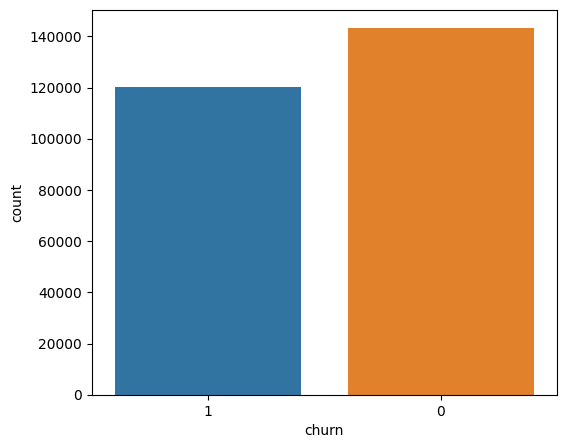

In [ ]:

# Pastikan kolom 'churn' bukan indeks dan memiliki tipe data yang benar
final.reset_index(inplace=True)
final['churn'] = final['churn'].astype(str)  # Konversi ke string jika belum

# Buat countplot
plt.figure(figsize=(6, 5))
sns.countplot(data=final, x='churn')
plt.show()


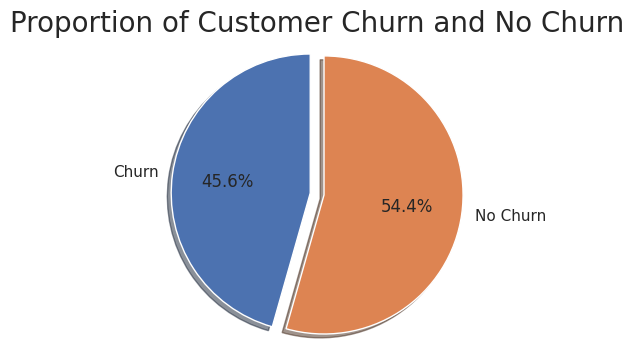

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah churn dan no churn
churn_counts = final['churn'].value_counts()

# Label dan ukuran untuk pie chart
labels = 'Churn', 'No Churn'
sizes = [churn_counts[1], churn_counts[0]]
explode = (0, 0.1)

# Buat pie chart menggunakan Matplotlib dengan gaya Seaborn
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
sns.color_palette("pastel")
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Proportion of Customer Churn and No Churn", size=20)
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()


In [ ]:
# counts = master.groupby(['customer_id']).created_at.nunique()
# counts.name = 'Number of Previous Visits'

In [ ]:
# y_var = master.groupby(['customer_id']).created_at.max() < '2022-04-30'
# y_var.name = 'Churned'

In [ ]:
# Dataset = counts.to_frame().join(y_var)
# Dataset

In [ ]:
# # Membagi dataset menjadi data training dan data testing
# X = Dataset['Number of Previous Visits'].values.reshape(-1,1)
# y = Dataset['Churned']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Membuat model decision tree
# clf = DecisionTreeClassifier()

# # Melatih model dengan data training
# clf.fit(X_train, y_train)

# # Memprediksi data testing
# y_pred = clf.predict(X_test)

# # Menghitung akurasi model
# accuracy = accuracy_score(y_test, y_pred)

# print(f"Akurasi model: {accuracy}")

# **4. Machine Learning**

###Baseline Model

In [ ]:
X = final_6month[['freq_transaction','freq_transaction','total_unique_product','total_quantity']]
y = final_6month['churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()

X_train= X_train.values.reshape(-1, 1)
X_test= X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

###Hyperparameter Tunning

###Cross Validation